In [1]:
#IMPORTING THE LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro,levene,f_oneway
from scipy.stats.mstats import kruskalwallis
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
%matplotlib inline

In [2]:
#LOADING DATAFRAME
df=pd.read_csv('Fever.csv')
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [3]:
#BASIC EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [4]:
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [5]:
sampleA1=np.array(df['Relief'][df['A']==1])
sampleA2=np.array(df['Relief'][df['A']==2])
sampleA3=np.array(df['Relief'][df['A']==3])
sampleB1=np.array(df['Relief'][df['B']==1])
sampleB2=np.array(df['Relief'][df['B']==2])
sampleB3=np.array(df['Relief'][df['B']==3])

#### Problem 1:

#### A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

## For Ingredient A

#### Step1: State the Null and alternative hypothesis

H\$o$: $\mu1$ = $\mu2$ = $\mu3$

The mean of all Compounds for the A ingredient is same.

H\$a$:

Atleast one of the mean of all Compounds for the A ingredient is different.

#### Step2: Decide Level of significance

Generally the level of significance will be 5% ($\alpha$ = 0.05)

#### Step3.1: Assumptions

Checking the normality of the data by Two Methods:

1) Shapiro Test (Statistical Method)

2) Histogram (Visual Method)

In [6]:
# SHAPIRO TEST
x=[sampleA1,sampleA2,sampleA3]
for i in x:
    print(shapiro(i))

(0.7686296701431274, 0.004211828112602234)
(0.728706955909729, 0.001616060733795166)
(0.847996175289154, 0.03468279168009758)


Text(0.5, 0, 'Relief')

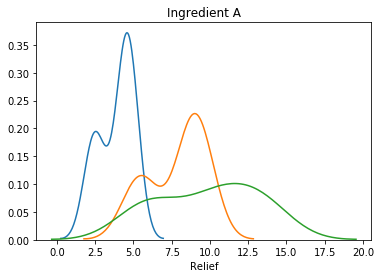

In [7]:
# HISTOGRAM
plt.title('Ingredient A')
sns.distplot(sampleA1,hist=False)
sns.distplot(sampleA2,hist=False)
sns.distplot(sampleA3,hist=False)
plt.xlabel('Relief')

From the Shapiro test for Pvalue is less than alpha.

Visually from the histogram the means of all sample is not normally distributed

Hence From the Assumptions, the data for all compounds for ingredients A is NOT showing normal distribution

#### Step3.2: Assumptions

Checking the variance of the data by Two Methods:

1) Levene Test (Statistical Method)

2) Boxplot (Visual Method)

In [8]:
# LEVENE TEST
levene(sampleA1,sampleA2,sampleA3)

LeveneResult(statistic=4.511350350740447, pvalue=0.018535088623493387)

Text(0.5, 0, 'Compound')

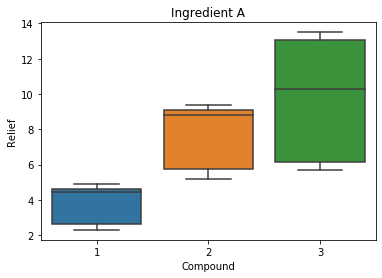

In [9]:
# BOX PLOT

plt.title('Ingredient A')

sns.boxplot(x='A',y='Relief',data=df)
plt.xlabel('Compound')

From the Levene test for Pvalue is less than alpha (0.018<0.05). 

Visually from the Boxplot, The variance of all sample is not equal.

So,the data for all compounds for ingredients A is not having equal variance.

Hence, from the Assumptions of both statistical method (Shapiro test: P-value is less than 5%),(levene test: P-value is less 

than 5%) and visual method from the Histogram and Box Plot, data looks not normal and having not equal variance, So we are

going for non parametric test (Kruskalwallis method to find the Hypothesis).

In [10]:
kruskalwallis(sampleA1,sampleA2,sampleA3)

KruskalResult(statistic=25.645036693704128, pvalue=2.6992992738200464e-06)

Since the p value in this scenario is less than $\alpha$ (0.05), we can say that Reject the Null Hypothesis ($H_0$).

As a result we know that atleast one of the compound is differs from the other category of the Ingredient A.

## In project as per question 1.2 asking to find oneway anova for variable A with relief 

In [11]:
# 1.2) Performing one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief':

formulaA='Relief ~ C(A)'
modelA=ols(formulaA,df).fit()
anova_table_A=anova_lm(modelA)
anova_table_A

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.02,110.010000,23.465387,4.578242e-07
Residual,33.0,154.71,4.688182,NaN,NaN


In [12]:
# Another method for finding One-Way anova for the variable ‘B’ with respect to the variable ‘Relief:

f_oneway(sampleA1,sampleA2,sampleA3)

F_onewayResult(statistic=23.4653868528214, pvalue=4.578241843043277e-07)

Since the p value in this scenario is less than $\alpha$ (0.05), we can say that Reject the Null Hypothesis ($H_0$).

As a result we know that atleast one of the compound is differs from the other category of the Ingredient A.

## For Ingredient B

#### Step1: State the Null and alternative hypothesis

H\$o$: $\mu1$ = $\mu2$ = $\mu3$

The mean of all Compounds for the B ingredient is same.

H\$a$:

Atleast one of the mean of all Compounds for the B ingredient is different.

#### Step2: Decide Level of significance

Generally the level of significance will be 5% ($\alpha$ = 0.05)

#### Step3.1: Assumptions

Checking the normality of the data by Two Methods:

1) Shapiro Test (Statistical Method)

2) Histogram (Visual Method)

In [13]:
# SHAPIRO TEST
x=[sampleB1,sampleB2,sampleB3]
for i in x:
    print(shapiro(i))

(0.7656338810920715, 0.003910908009856939)
(0.8065383434295654, 0.01112875435501337)
(0.8446834087371826, 0.031581711024045944)


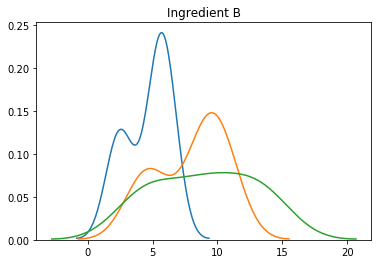

In [14]:
# HISTOGRAM
plt.title('Ingredient B')
sns.distplot(sampleB1,hist=False)
sns.distplot(sampleB2,hist=False)
sns.distplot(sampleB3,hist=False)

From the Shapiro test for Pvalue is less than alpha.

Visually from the histogram the means of all sample is not normally distributed

Hence From the Assumptions, the data for all compounds for ingredients B is not showing normal distribution

#### Step3.2: Assumptions

Checking the variance of the data by Two Methods:

1) Levene Test (Statistical Method)

2) Boxplot (Visual Method)

Text(0.5, 0, 'Compound')

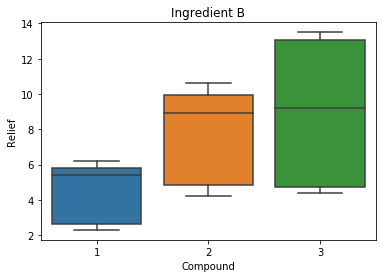

In [15]:
# BOX PLOT

plt.title('Ingredient B')

sns.boxplot(x='B',y='Relief',data=df)
plt.xlabel('Compound')

In [16]:
# LEVENE TEST
levene(sampleB1,sampleB2,sampleB3)

LeveneResult(statistic=2.941356517208818, pvalue=0.06675699295483081)

From the Levene test for Pvalue is greater than alpha (0.066 > 0.05). Hence we are fail to reject Ho.

So,the data for all compounds for ingredients A is not having slightly equal variance.

Hence, from the Assumptions of both statistical method (Shapiro test: P-value is less than 5%),(levene test: P-value is greater than 5%) 

and visual method from the Histogram and Box Plot, data looks not normal and having slighlty equal variance, So we are

going for parametric test (One way anova method to find the Hypothesis).

In [17]:
# 1.3) Performing one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief':

formulaB='Relief ~ C(B)'
modelB=ols(formulaB,df).fit()
anova_table_B=anova_lm(modelB)
anova_table_B

,df,sum_sq,mean_sq,F,PR(>F)
C(B),2.0,123.66,61.830000,8.126777,0.00135
Residual,33.0,251.07,7.608182,NaN,NaN


In [18]:
# Another method for finding One-Way anova for the variable ‘B’ with respect to the variable ‘Relief:

f_oneway(sampleB1,sampleB2,sampleB3)

F_onewayResult(statistic=8.12677739275899, pvalue=0.001349770498769494)

Since the p value in this scenario is less than $\alpha$ (0.05), we can say that Reject the Null Hypothesis ($H_0$).

As a result we know that atleast one of the compound is differs from the other category of the Ingredient B.

### Checking the Interaction of the compounds with the Ingredients A and B

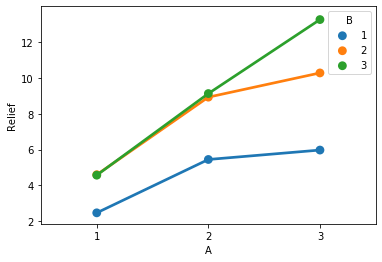

In [19]:
sns.pointplot(x='A',y='Relief',data=df,hue='B',ci=None)

As seen from the above two interaction plots, there is a significant interaction with the two variables of the compounds for Ingredients A and B.

In [20]:
#Interaction Effect with Two way anova:
formulaAB='Relief ~ C(A):C(B)'
model=ols(formulaAB,data=df).fit()
aov_table=anova_lm(model,type=2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(A):C(B),8.0,373.105,46.638125,774.910385,7.710504e-30
Residual,27.0,1.625,0.060185,NaN,NaN


In [21]:

formulaAB='Relief ~ C(A)+C(B)'
model=ols(formulaAB,data=df).fit()
aov_table=anova_lm(model,type=2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.02,110.010000,109.832850,8.514029e-15
C(B),2.0,123.66,61.830000,61.730435,1.546749e-11
Residual,31.0,31.05,1.001613,NaN,NaN


In [22]:
#Interaction Effect with Two way anova:
formulaABboth='Relief ~ C(A)+C(B)+C(A):C(B)'
model=ols(formulaABboth,data=df).fit()
aov_table=anova_lm(model,type=2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.020,110.010000,1827.858462,1.514043e-29
C(B),2.0,123.660,61.830000,1027.329231,3.348751e-26
C(A):C(B),4.0,29.425,7.356250,122.226923,6.972083e-17
Residual,27.0,1.625,0.060185,NaN,NaN


The P value is very less than alpha 

So, From the statistical test (ANOVA Test) there is significant interaction with the two variables of the compounds for Ingredients A and B.

#### Problem 2:

#### The dataset Education - Post 12th Standard.csv is a dataset that contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx

In [23]:
data_df=pd.read_csv('Education Post 12th Standard.csv')
data_df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [24]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [25]:
data_df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [26]:
data_df.shape

(777, 18)

In [27]:
data_df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [28]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [29]:
# Check for duplicate data

dup = data_df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [30]:
data_df.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [31]:
data_df=data_df.drop(["Names"],axis=1)

### Univariate analysis

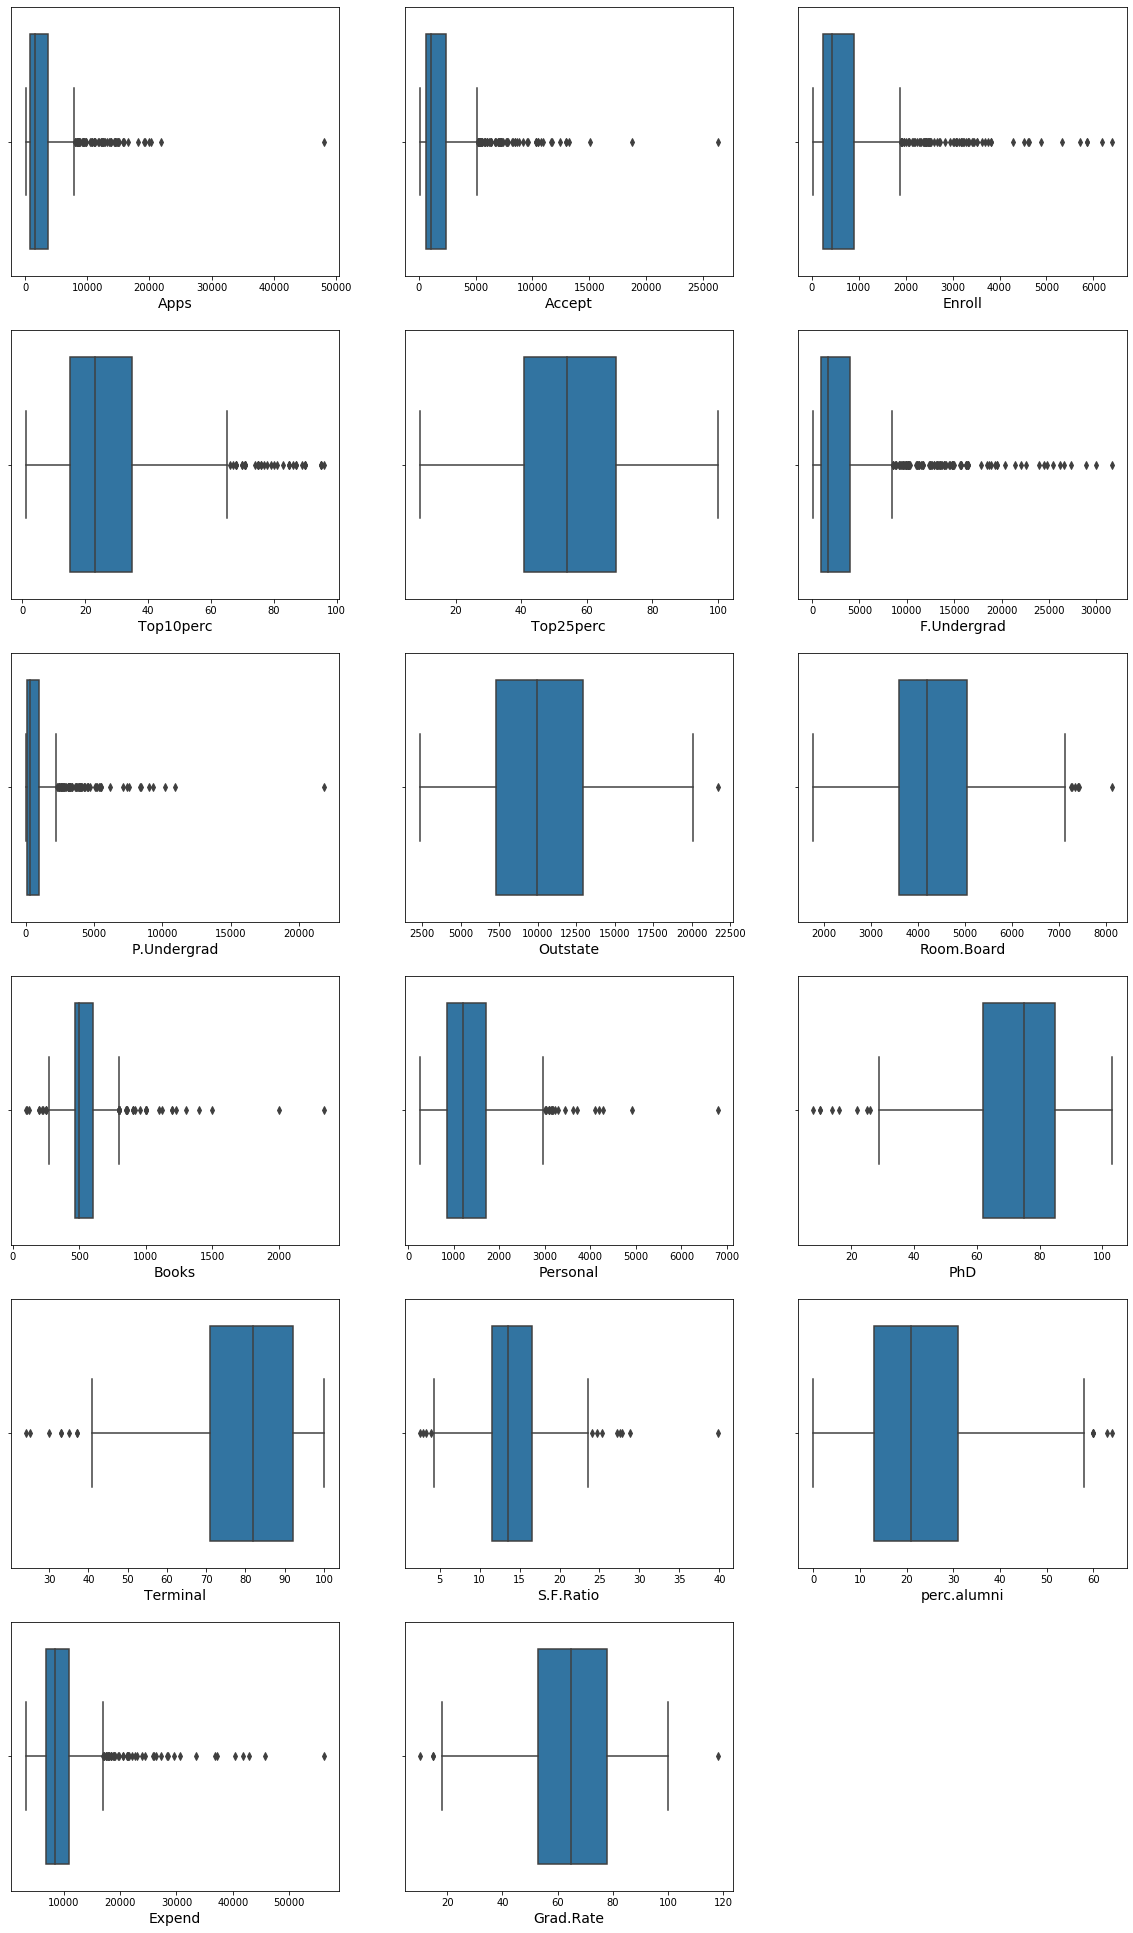

In [32]:
#  BOXLOT using - FOR Loop
rowCnt = len(data_df.columns)
colCnt = 3
subCnt = 1

fig = plt.figure(figsize=(20,100))

for i in data_df.columns:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=14)
    sns.boxplot(data_df[i])
    subCnt = subCnt + 1

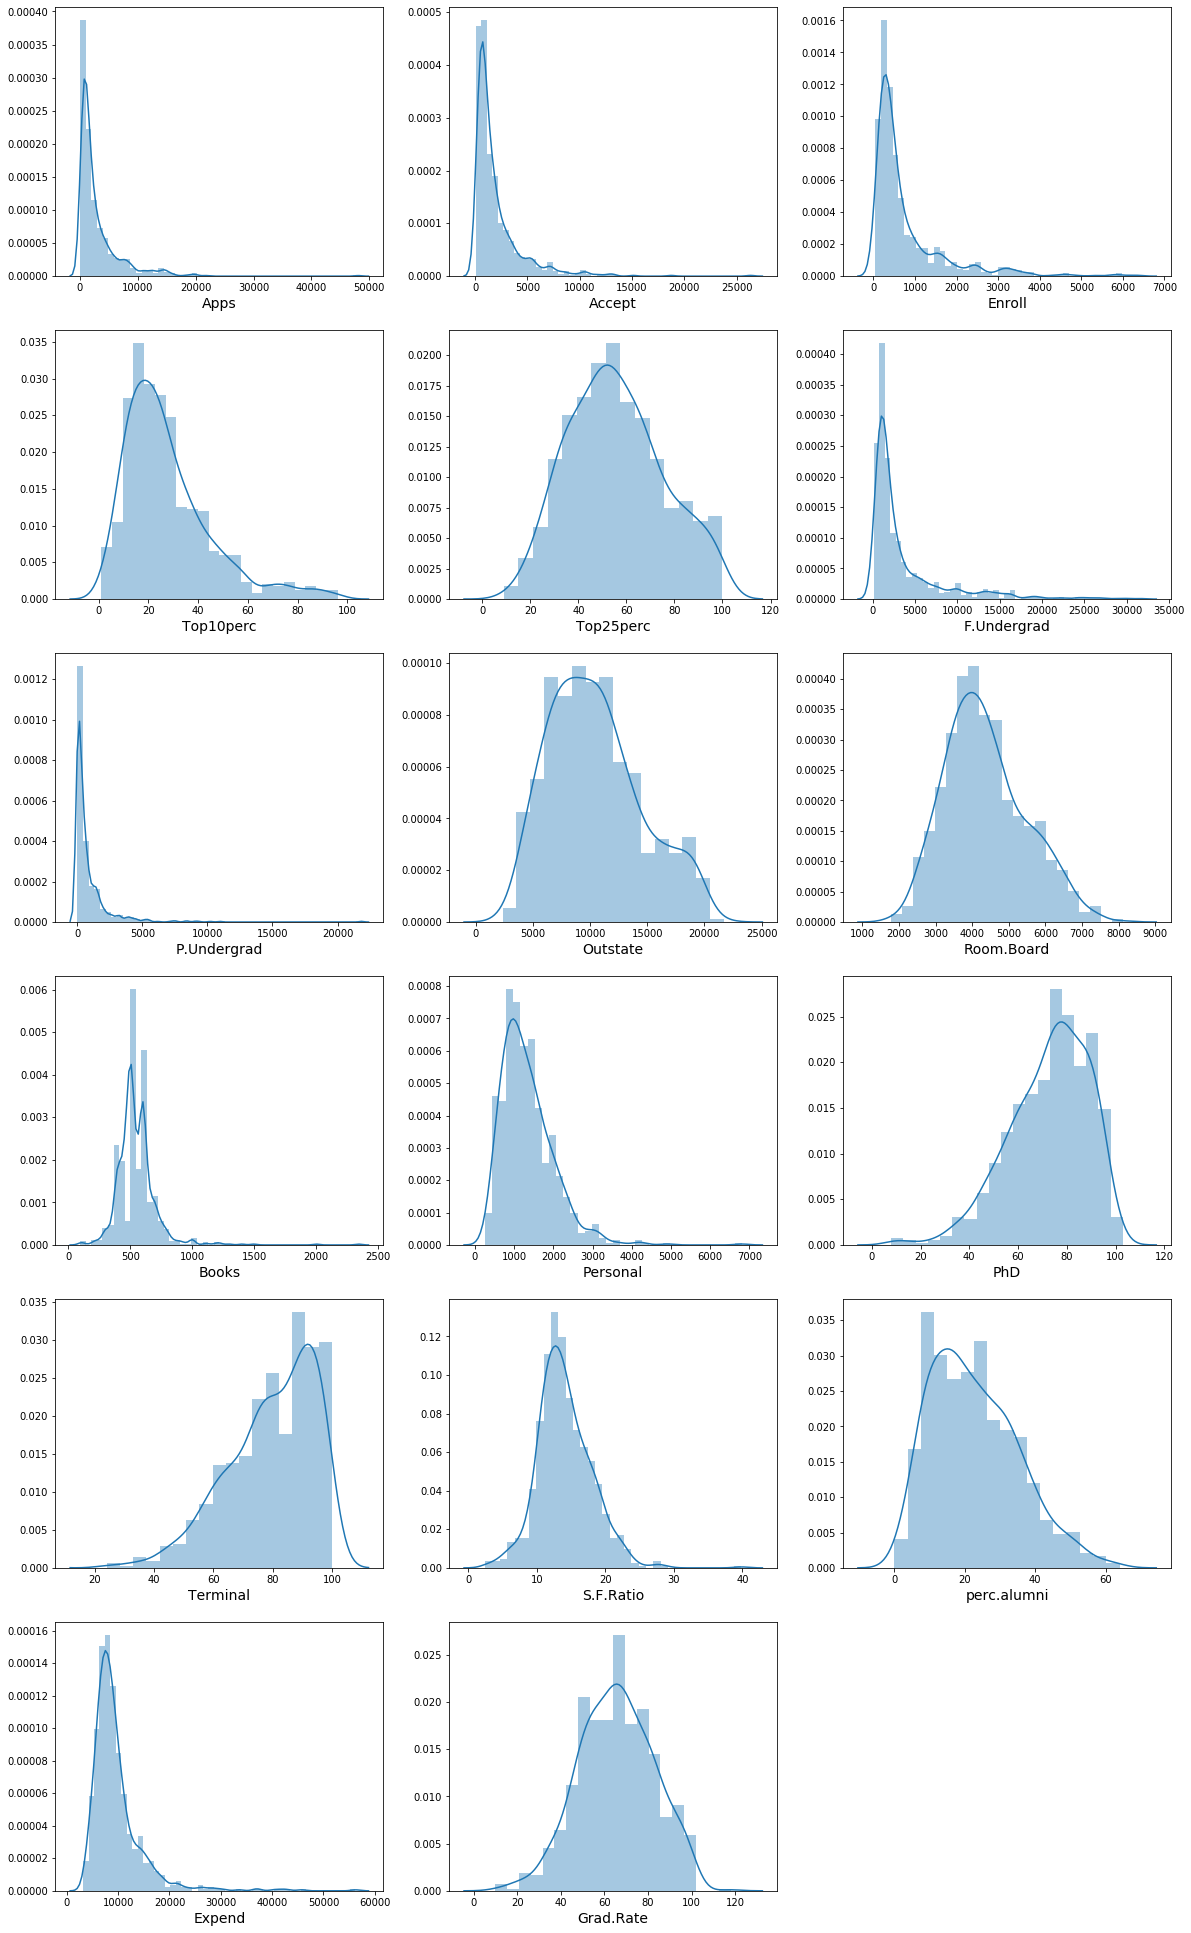

In [33]:
#  HISTOGRAM using - FOR Loop
rowCnt = len(data_df.columns)
colCnt = 3
subCnt = 1

fig = plt.figure(figsize=(20,100))
for j in data_df.columns:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(j, fontsize=14)
    sns.distplot(data_df[j])
    subCnt = subCnt + 1

### Bi- Variate Analysis:

In [34]:
corr=data_df.corr(method='pearson')

(17.0, 0.0)

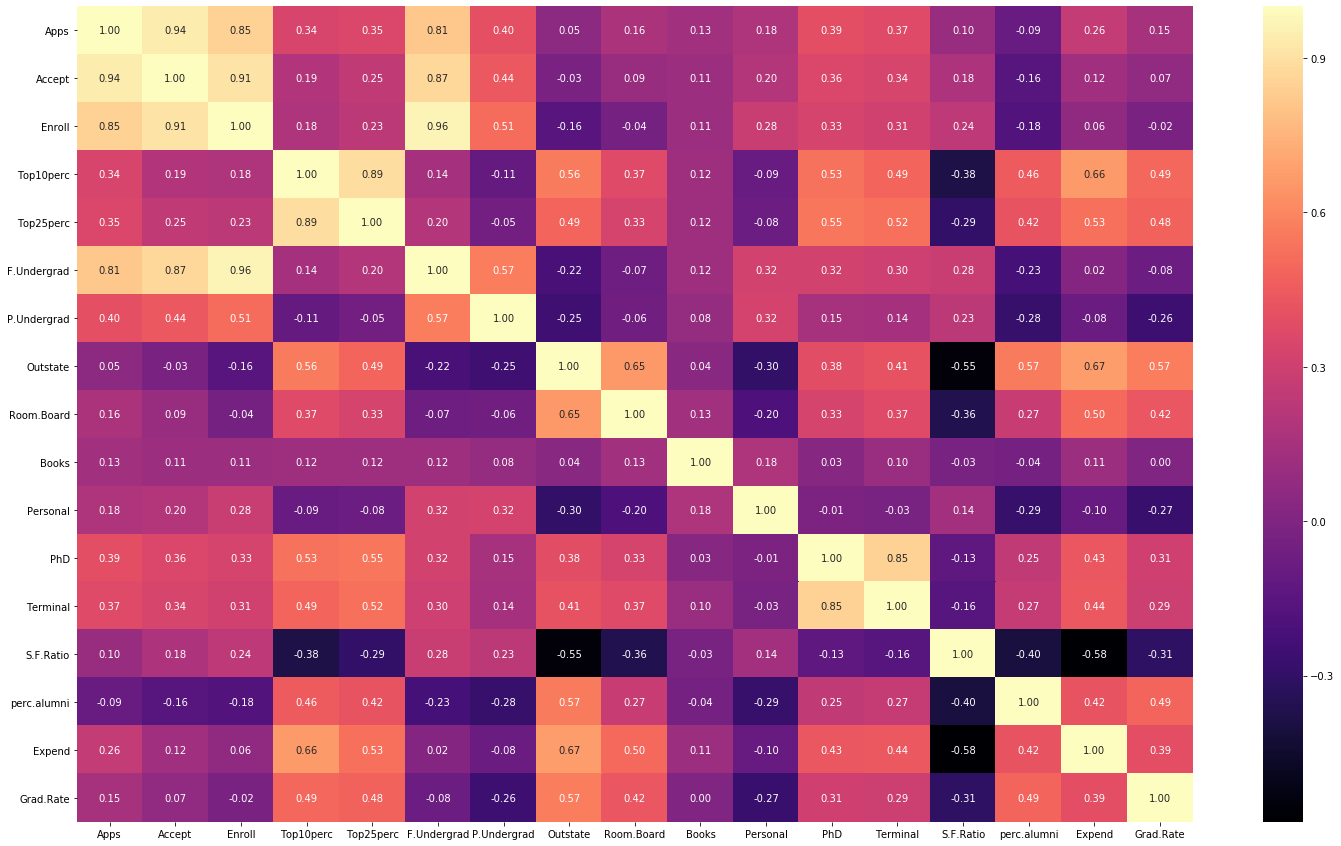

In [35]:
# plot the correlation coefficients as a heatmap
plt.subplots(figsize=(25,15))
ax=sns.heatmap(data_df.corr(), annot=True,fmt='.2f',cmap='magma')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

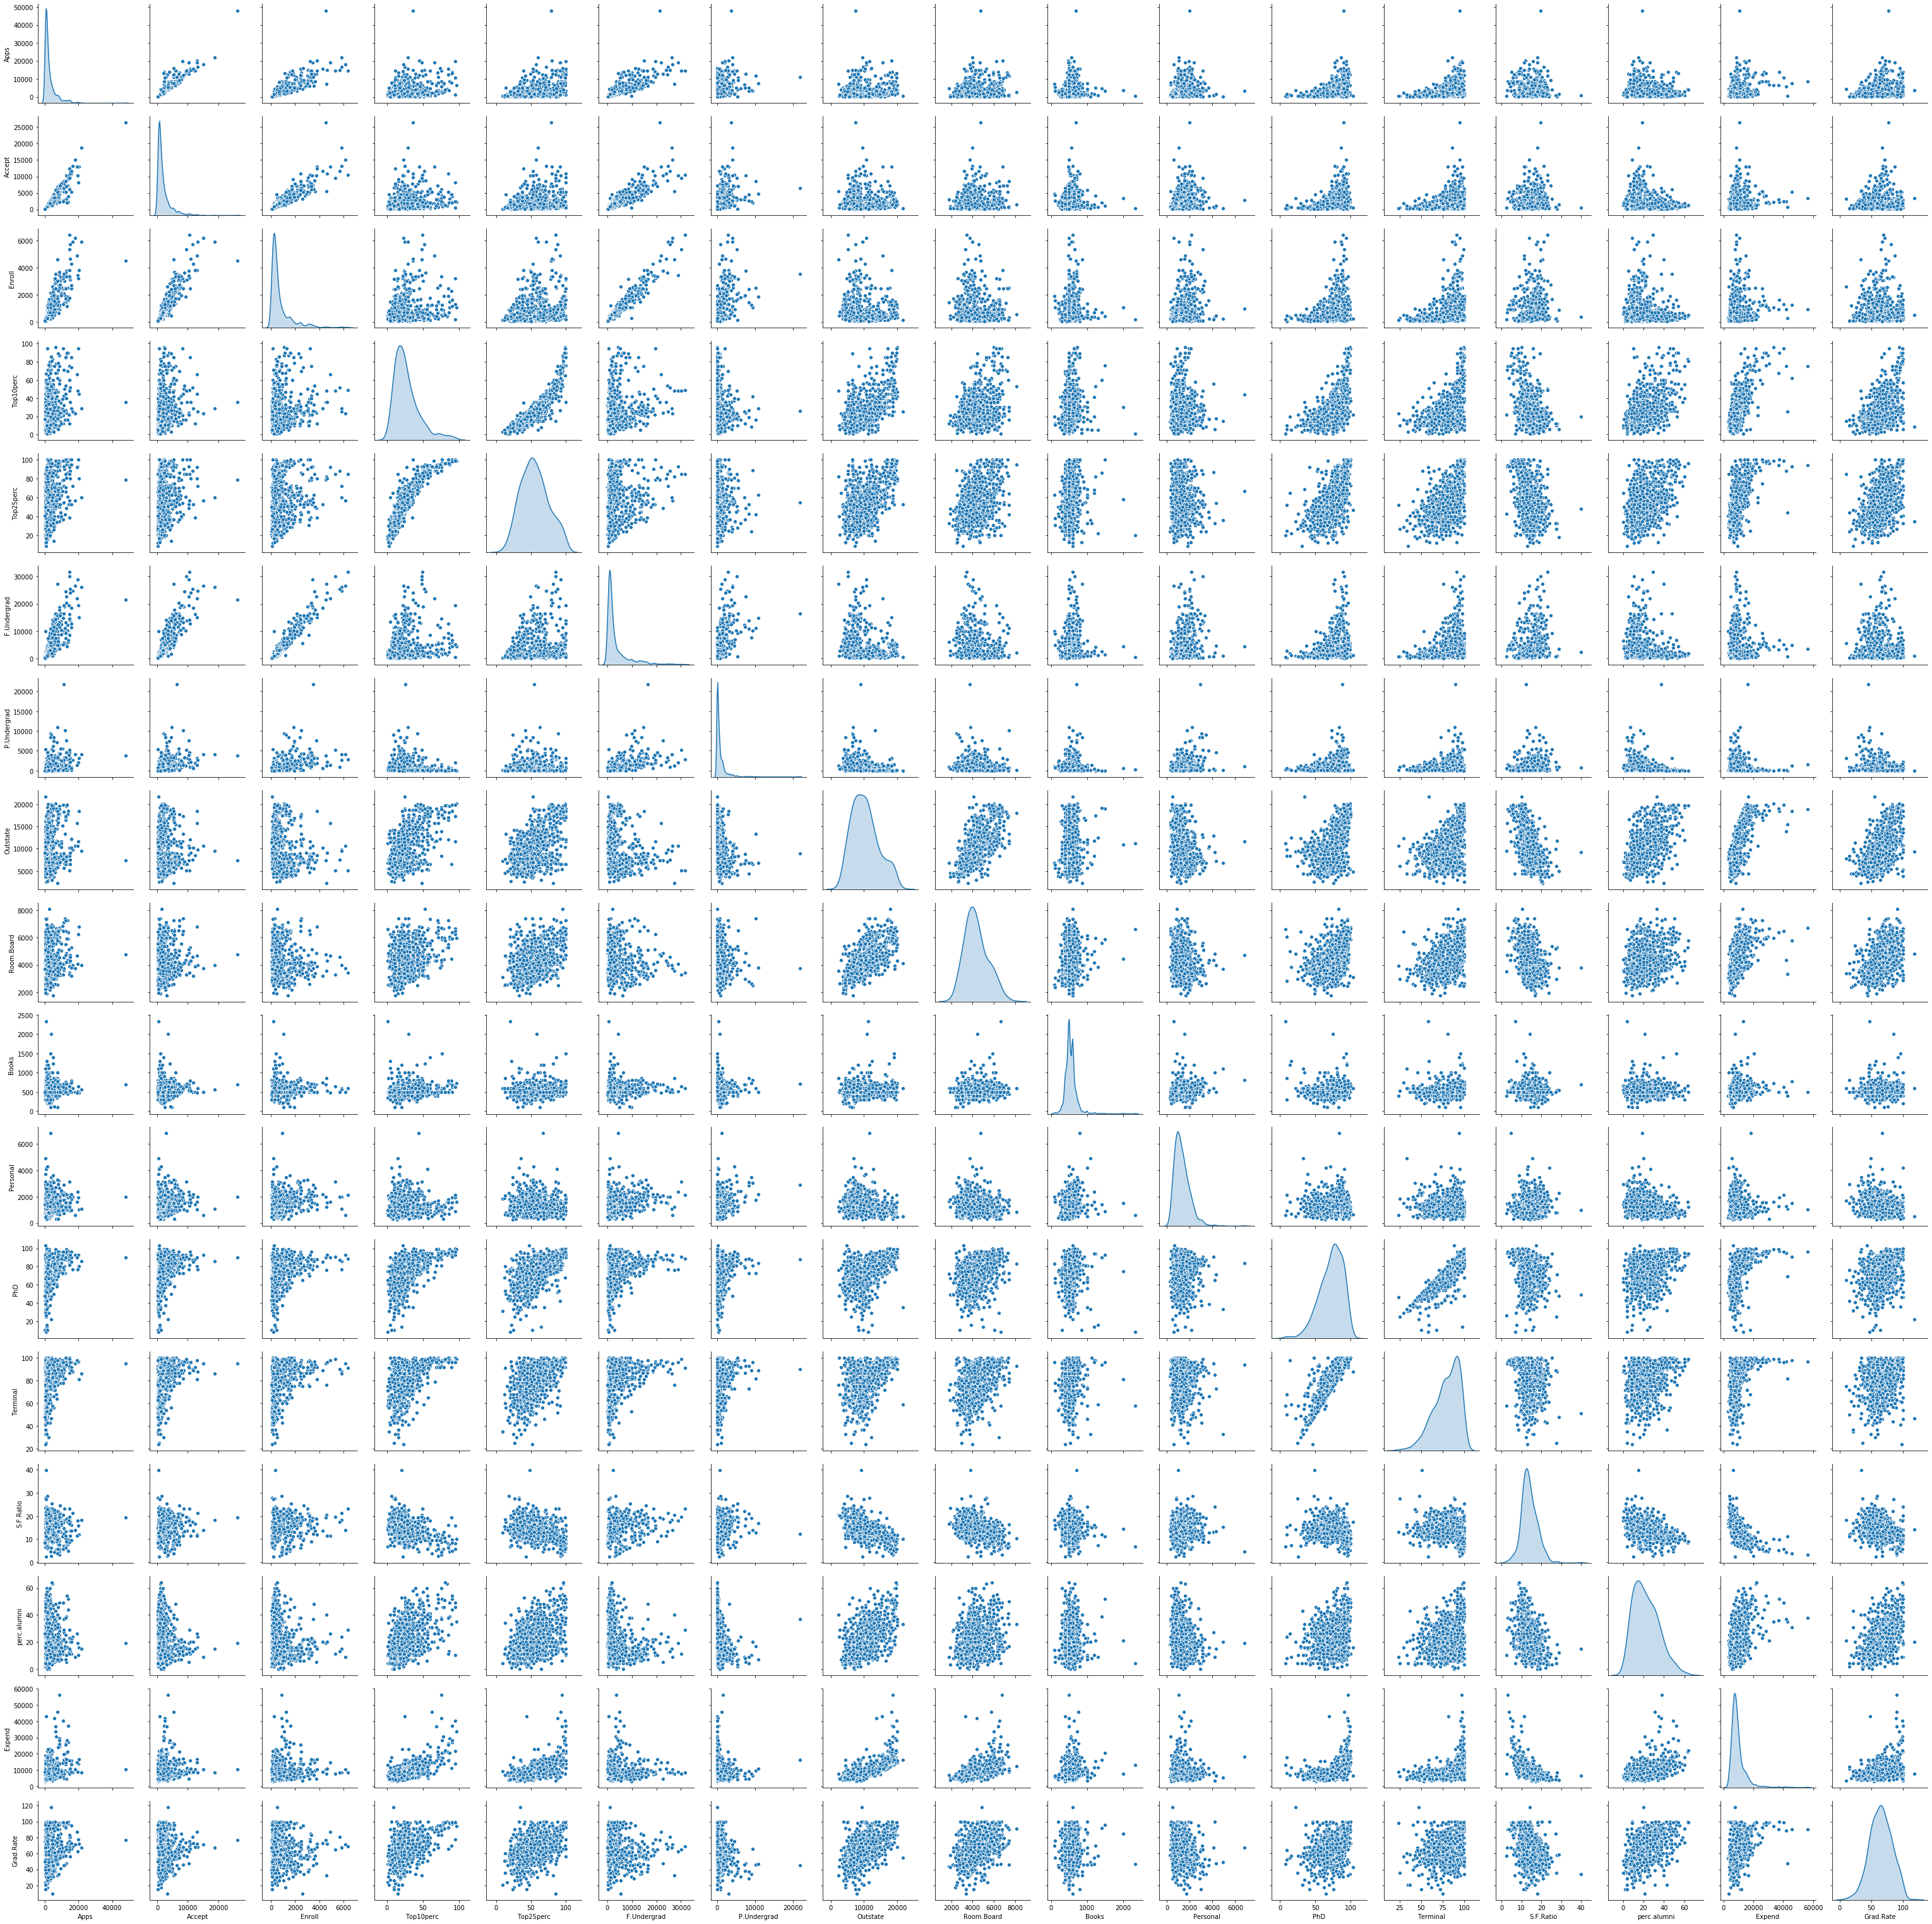

In [36]:
#Let us check for pair plots
sns.pairplot(data_df,diag_kind='kde')
plt.show()

## Outlier Check & Treatment

### Outlier Check using Boxplot

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 17 Text xticklabel objects>)

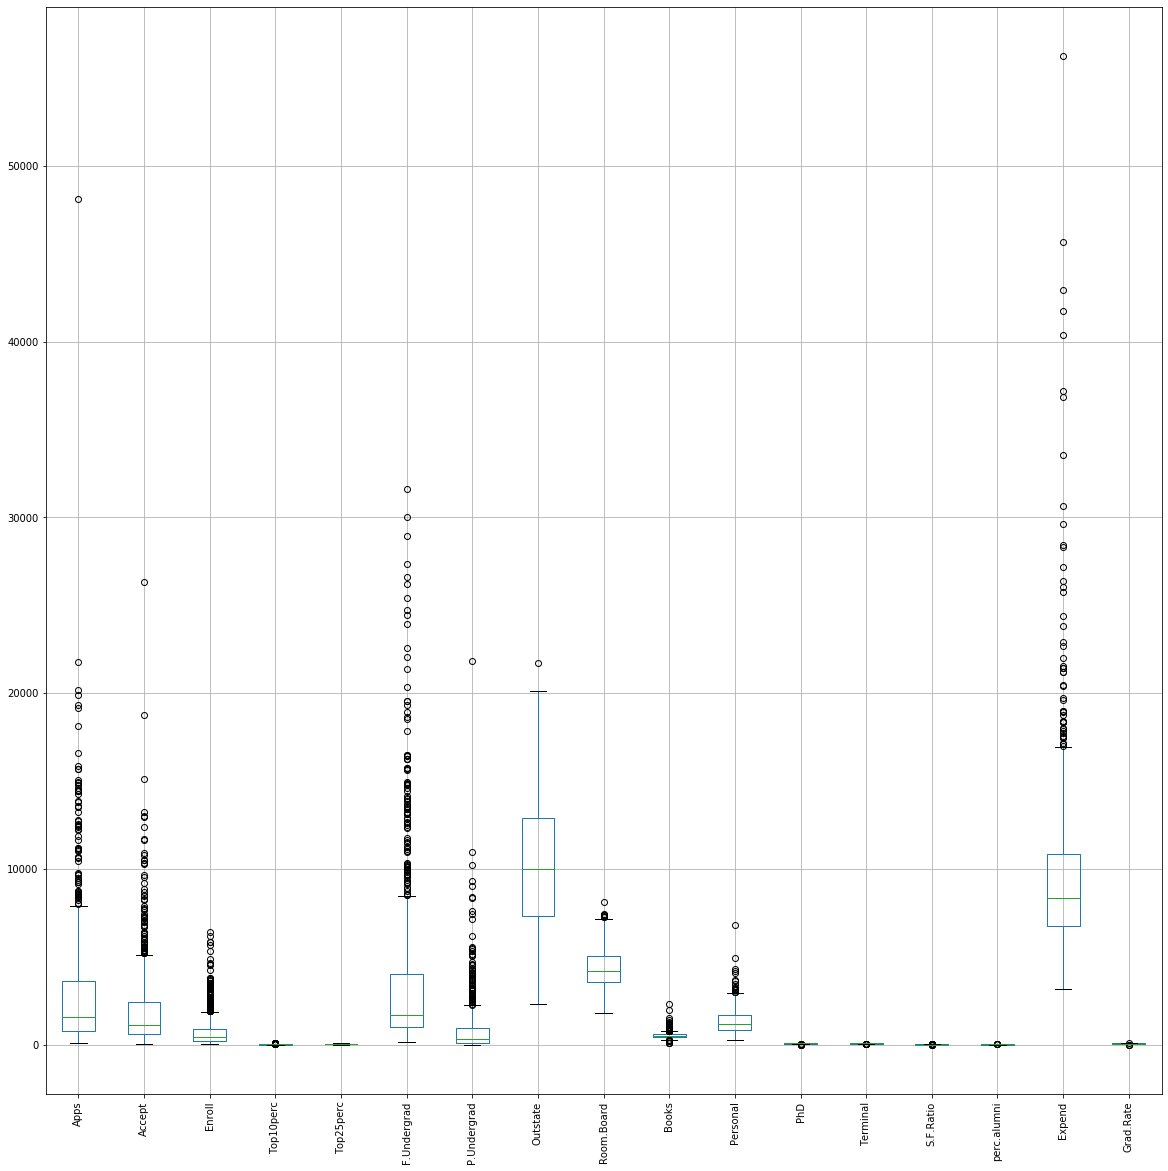

In [37]:
data_df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)

### Outlier treatment : define a custom function- If for a particular column the max value is greater than that assign max value,same logic for min value

In [38]:
# Making the definition for outlier treatment in the dataframe
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

#converting column names into list, inorder to pass through For loop
cols=data_df.columns.tolist()

for i in cols:
    low,upp=remove_outlier(data_df[i])
    data_df[i]=np.where(data_df[i]<low,low,data_df[i])
    data_df[i]=np.where(data_df[i]>upp,upp,data_df[i])

### Plotting Boxplot after outlier treatment

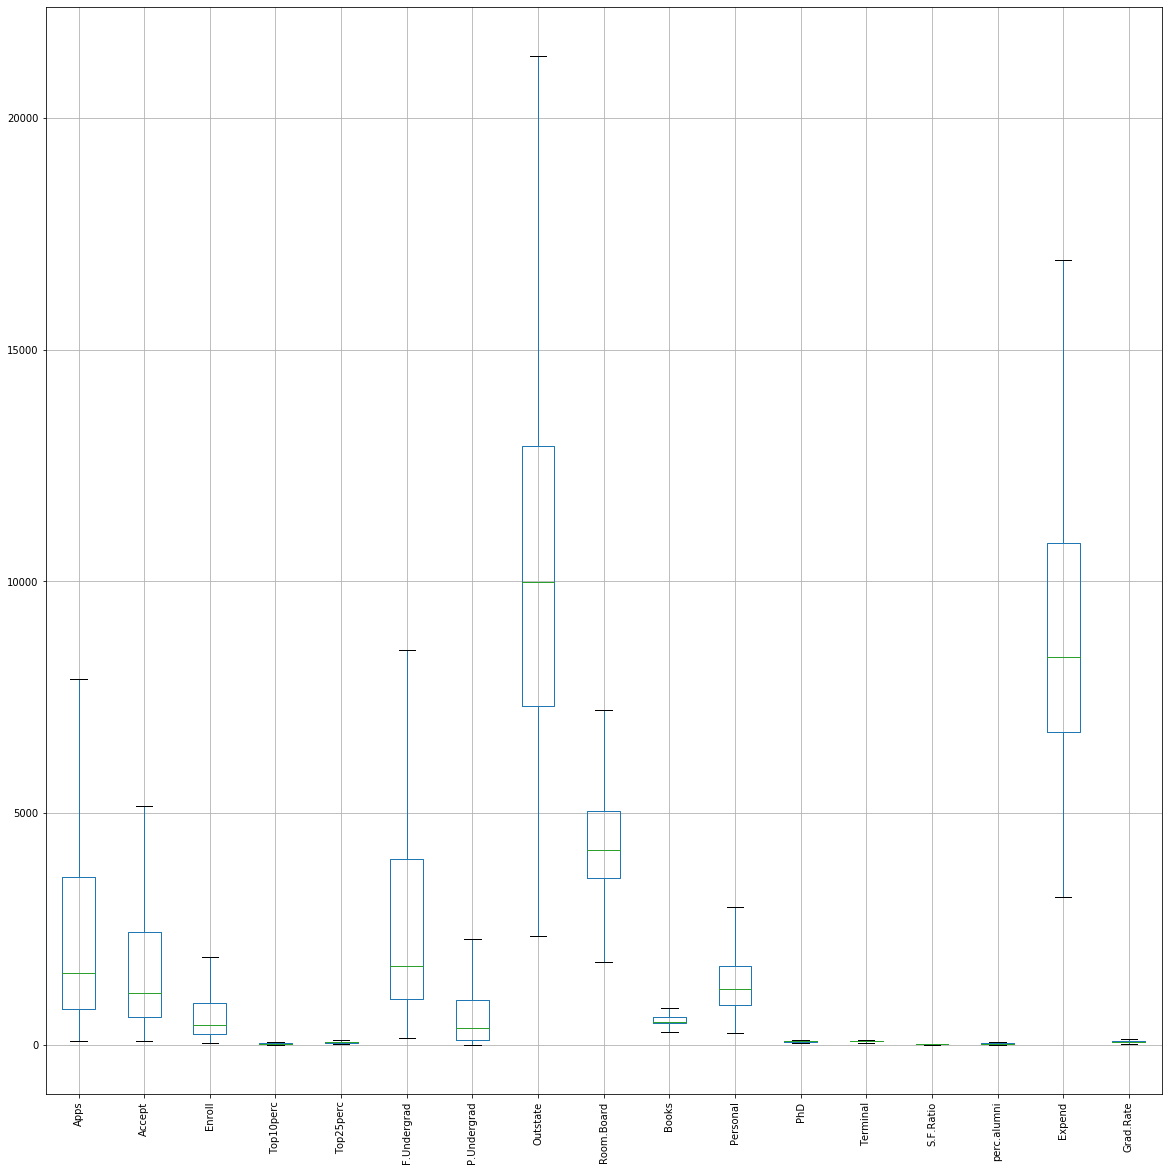

In [39]:
data_df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

## PCA
### PCA is a statistical technique and uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. PCA also is a tool to reduce multidimensional data to lower dimensions while retaining most of the information. Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible.

This PCA can only be done on continuous variables

### Standardizing before processing PCA

In [40]:
from scipy.stats import zscore
data_new=data_df.apply(zscore)
data_new.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


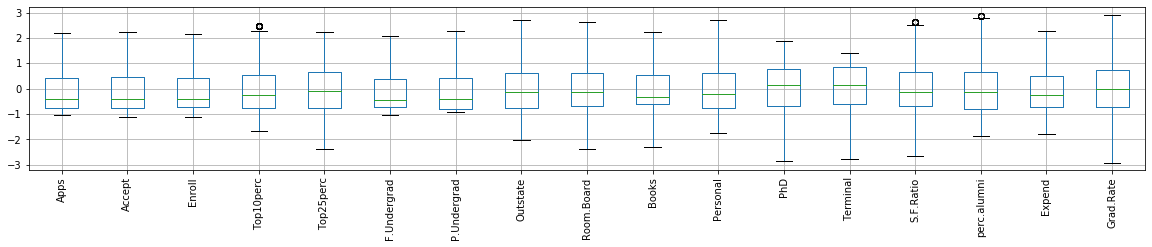

In [41]:
data_new.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

### Create a covariance matrix for identifying Principal components

In [42]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [43]:
# converting Covaraince matrix to dataframe
pd.DataFrame(cov_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.001289,0.956538,0.898039,0.321756,0.364961,0.862111,0.520493,0.065421,0.187717,0.236442,0.230244,0.464522,0.435038,0.126574,-0.101288,0.243248,0.150998
1,0.956538,1.001289,0.936482,0.223586,0.274033,0.898190,0.573429,-0.005009,0.119740,0.208974,0.256676,0.427891,0.403929,0.188749,-0.165729,0.162017,0.079084
2,0.898039,0.936482,1.001289,0.171977,0.230731,0.968549,0.642422,-0.155856,-0.023876,0.202317,0.339785,0.382031,0.354836,0.274622,-0.223010,0.054291,-0.023281
3,0.321756,0.223586,0.171977,1.001289,0.915053,0.111358,-0.180241,0.562884,0.357826,0.153650,-0.116880,0.544749,0.507401,-0.388426,0.456384,0.657886,0.494307
4,0.364961,0.274033,0.230731,0.915053,1.001289,0.181429,-0.099423,0.490200,0.331413,0.169980,-0.086922,0.552172,0.528334,-0.297616,0.417369,0.573643,0.479602
5,0.862111,0.898190,0.968549,0.111358,0.181429,1.001289,0.697027,-0.226457,-0.054546,0.208147,0.360246,0.362030,0.335486,0.324922,-0.285825,0.000371,-0.082345
6,0.520493,0.573429,0.642422,-0.180241,-0.099423,0.697027,1.001289,-0.354673,-0.067725,0.122686,0.344496,0.127827,0.122309,0.371085,-0.419874,-0.202189,-0.265499
7,0.065421,-0.005009,-0.155856,0.562884,0.490200,-0.226457,-0.354673,1.001289,0.656334,0.005117,-0.326029,0.391825,0.413110,-0.574422,0.566465,0.776327,0.573196
8,0.187717,0.119740,-0.023876,0.357826,0.331413,-0.054546,-0.067725,0.656334,1.001289,0.109065,-0.219837,0.341909,0.379759,-0.376915,0.272744,0.581370,0.426339
9,0.236442,0.208974,0.202317,0.153650,0.169980,0.208147,0.122686,0.005117,0.109065,1.001289,0.240172,0.136566,0.159523,-0.008547,-0.042887,0.150177,-0.008061


### Comparing Correlation and Covariance Matrix

In [44]:
# Now without Scaling lets check out correlation matrix
df_corr = data_df.copy()
df_corr.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.391321,0.412579,-0.573683,0.565736,0.775328,0.572458
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


In [45]:
#With standardisation (Without standardisation also, correlation matrix yields same result)
data_new.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.391321,0.412579,-0.573683,0.565736,0.775328,0.572458
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


### Identify eigenvalues and eigenvectors

In [46]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]


Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.

We see that there are totally 4 eigenvalues greater than 1

### Cumulative Distribution of Eigenvalues

In [47]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
var_exp

[33.26608366671334,
 28.755345008170767,
 6.617163554717721,
 5.898143957623828,
 5.123892672339149,
 4.498638671547022,
 3.4362426556658194,
 3.1988471732052015,
 2.4881075492912634,
 2.238396454242056,
 1.4511567777537853,
 0.865143448811295,
 0.7892466165436482,
 0.5806273152471962,
 0.43878768621189507,
 0.22261871681452747,
 0.13155807510148385]

In [48]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


### Scree plot

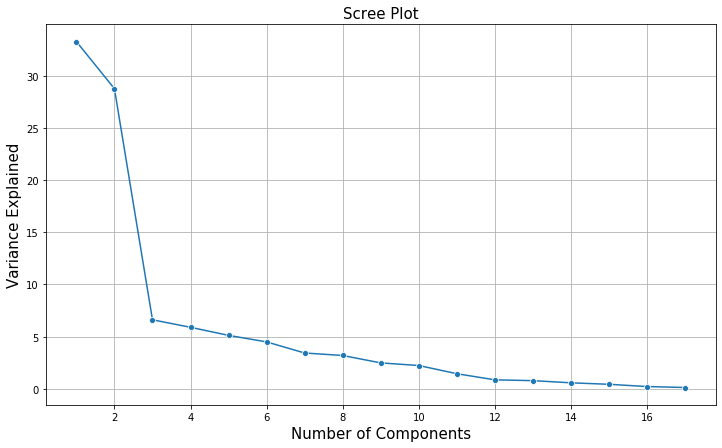

In [49]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

- **Visually we can observe that their is steep drop in variance explained with increase in number of PC's.**
- **We will proceed with 8 components here. But depending on requirement 90% variation is good**

### Plot Cumulative explained variance and individual explained variance vs Principal Components

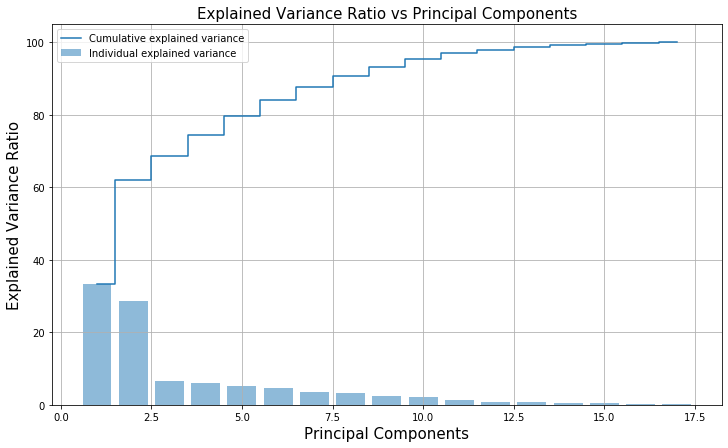

In [50]:
# Ploting 
plt.figure(figsize=(12 ,7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

### Use PCA from sklearn's decomposition class and find Principal Components

In [51]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 17 to 8)

pca = PCA(n_components=8)
data_reduced = pca.fit_transform(data_new)
data_reduced


array([[-1.60249937e+00,  9.93683013e-01,  3.00447636e-02, ...,
        -6.97475824e-01,  7.10616255e-01,  8.95166868e-01],
       [-1.80467545e+00, -7.04149922e-02,  2.12212752e+00, ...,
         9.94858508e-01, -3.96083169e-01,  2.59664018e-01],
       [-1.60828257e+00, -1.38279212e+00, -5.01512552e-01, ...,
        -1.02623665e+00, -1.65310575e-01, -4.08817874e-01],
       ...,
       [-5.76882673e-01,  1.77984611e-02,  3.22160336e-01, ...,
         5.04042792e-01, -1.45835209e+00, -2.89146665e-01],
       [ 6.57095200e+00, -1.18493014e+00,  1.32596561e+00, ...,
        -8.22745604e-01,  1.20132639e+00,  5.73988519e-03],
       [-4.77393067e-01,  1.04394672e+00, -1.42543835e+00, ...,
         1.05180970e+00,  1.07308672e+00,  6.05416581e-01]])

In [52]:
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177245e-02, -1.07658626e-01, -8.55296892e-02,
         7.88293849e-02,  5.07938247e-02, -7.37077827e-02,
        -4.03568700e-02, -1.49394795e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [53]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893,
       0.04498639, 0.03436243, 0.03198847])

In [54]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([33.3, 62.1, 68.7, 74.6, 79.7, 84.2, 87.6, 90.8])

**The Cumulative % gives the percentage of variance accounted for by the n components. For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the number of components by selecting the components which explained the high variance.**

**In the above array we see that the first feature explains 32.5% of the variance within our data set while the first two explain 61.2 and so on. If we employ 8 features we capture ~ 90% of the variance within the dataset, thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total variance explained).**

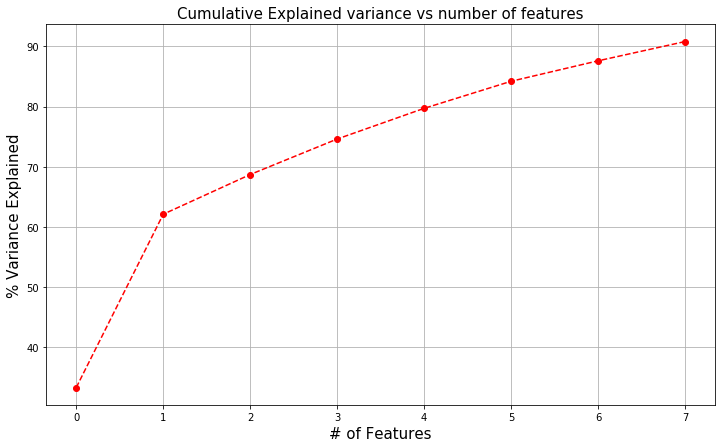

In [55]:
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance vs number of features',fontsize=15)
plt.grid()
plt.show()

In [56]:
pca_df=pd.DataFrame(data_reduced,index=data_df['Names'])
pca_df

KeyError: 'Names'

In [ ]:
pca_df.to_csv('PCA_Education Post 12th Standard.csv')

                                            THE END